<a href="https://colab.research.google.com/github/Panthisarang/DeepLearning-Model-Collection/blob/main/DL_usecases_1_to_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Classification with NN

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

##Data Collection & Processing

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
data_frame.shape

(569, 31)

In [9]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [14]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [15]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Splitting the data into training data & Testing data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

##**Building the Neural Network**

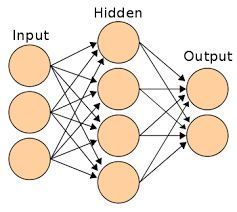

In [22]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [23]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [24]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 3s 73ms/step - loss: 1.3511 - accuracy: 0.3545 - val_loss: 0.9854 - val_accuracy: 0.4565
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.9404 - accuracy: 0.5746 - val_loss: 0.6520 - val_accuracy: 0.6087
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6490 - accuracy: 0.6773 - val_loss: 0.4541 - val_accuracy: 0.7609
Epoch 4/10
13/13 [==============================] - 0s 17ms/step - loss: 0.4607 - accuracy: 0.7726 - val_loss: 0.3370 - val_accuracy: 0.8696
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 0.3475 - accuracy: 0.8606 - val_loss: 0.2656 - val_accuracy: 0.8913
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2843 - accuracy: 0.8949 - val_loss: 0.2222 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2421 - accuracy: 0.9144 - val_loss: 0.1948 - val_accuracy: 0.9348
Epoch 8/10
13/

Visualizing accuracy and loss

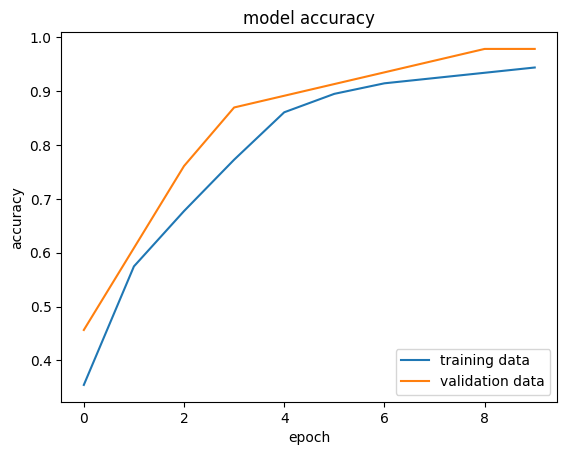

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

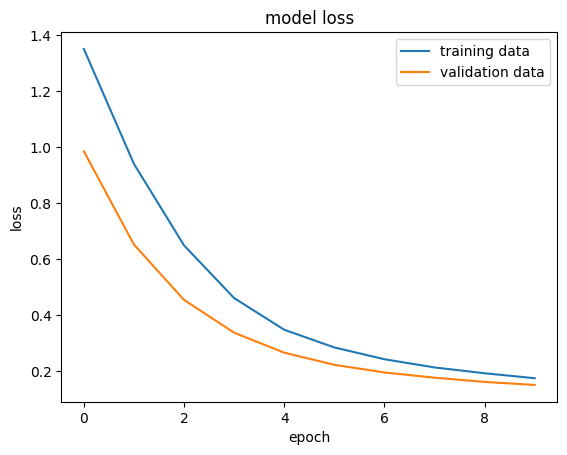

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [28]:
loss,accruacy = model.evaluate(X_test_std, Y_test)
print(accruacy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1634 - accuracy: 0.9561
0.9561403393745422


In [30]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [31]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [32]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.5416403 0.8937438]


In [34]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [35]:
print(Y_pred)

[[0.5416403  0.8937438 ]
 [0.57343316 0.70344037]
 [0.36705497 0.99307036]
 [0.9996933  0.5249677 ]
 [0.6754293  0.59684384]
 [0.9837446  0.37875852]
 [0.41008663 0.79516506]
 [0.33196086 0.98762727]
 [0.3503371  0.93671906]
 [0.6019521  0.96108705]
 [0.47324297 0.7025044 ]
 [0.52752775 0.9444279 ]
 [0.3739058  0.89420056]
 [0.36876675 0.8477749 ]
 [0.26481688 0.93689126]
 [0.8720313  0.61550665]
 [0.51802564 0.97561264]
 [0.6431417  0.97885287]
 [0.3495665  0.97106606]
 [0.97996134 0.24250479]
 [0.9516471  0.9943723 ]
 [0.4679872  0.9773085 ]
 [0.49560797 0.9609524 ]
 [0.43625194 0.98507303]
 [0.47085655 0.8839059 ]
 [0.9386227  0.5872075 ]
 [0.47387514 0.914941  ]
 [0.64202106 0.93396676]
 [0.9082458  0.6152237 ]
 [0.91812783 0.509971  ]
 [0.76980436 0.9543332 ]
 [0.2826547  0.8903201 ]
 [0.53271705 0.9553389 ]
 [0.9974913  0.29142514]
 [0.96933115 0.4739633 ]
 [0.67965907 0.899973  ]
 [0.4018336  0.99175704]
 [0.5104065  0.9011992 ]
 [0.334658   0.9783281 ]
 [0.5094889  0.94243383]


model.predict() gives the prediction probability of each class for that data point

In [36]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [39]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


##**Building the predictive system**


In [38]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 34ms/step
[[0.29101622 0.9666604 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Processing Image data for Deep Learning

In [40]:
# getting an image using web get

!wget 'https://tractive.com/blog/wp-content/uploads/2016/04/puppy-care-guide-for-new-parents.jpg'

--2024-07-11 05:06:23--  https://tractive.com/blog/wp-content/uploads/2016/04/puppy-care-guide-for-new-parents.jpg
Resolving tractive.com (tractive.com)... 54.192.18.105, 54.192.18.89, 54.192.18.111, ...
Connecting to tractive.com (tractive.com)|54.192.18.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113570 (111K) [image/jpeg]
Saving to: ‘puppy-care-guide-for-new-parents.jpg’

puppy-care-guide-fo 100%[===================>] 110.91K   345KB/s    in 0.3s    

2024-07-11 05:06:24 (345 KB/s) - ‘puppy-care-guide-for-new-parents.jpg’ saved [113570/113570]



**Libraries that can be used for image processing:**

matplotlib.image

Pillow

OpenCV (cv2)

In [41]:
# importing the image module from matplotlib library

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [42]:
# loading an image through matplotlib.image module

img = mpimg.imread('/content/dog.jpg')

In [43]:
type(img)

numpy.ndarray

In [44]:
print(img.shape)

(1365, 2048, 3)


In [45]:
print(img)

[[[147 182   0]
  [147 182   0]
  [147 182   0]
  ...
  [128 148   0]
  [128 148   0]
  [128 148   0]]

 [[146 181   0]
  [146 181   0]
  [147 182   0]
  ...
  [128 148   0]
  [128 148   0]
  [128 148   0]]

 [[145 180   0]
  [145 180   0]
  [145 180   0]
  ...
  [128 148   0]
  [128 148   0]
  [128 148   0]]

 ...

 [[ 76  69  25]
  [ 76  69  25]
  [ 75  68  24]
  ...
  [135 106  38]
  [135 106  38]
  [135 106  38]]

 [[ 76  69  25]
  [ 76  69  25]
  [ 75  68  24]
  ...
  [135 106  38]
  [135 106  38]
  [135 106  38]]

 [[ 76  69  25]
  [ 76  69  25]
  [ 75  68  24]
  ...
  [135 106  38]
  [135 106  38]
  [135 106  38]]]


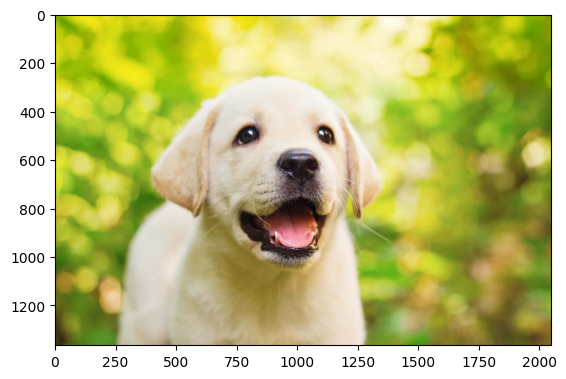

In [46]:
# displaying the image from numpy array

img_plot = plt.imshow(img)
plt.show()

Resizing the image using Pillow library

In [47]:
from PIL import Image

In [48]:
img = Image.open('/content/dog.jpg')
img_resized = img.resize((200, 200))

In [49]:
img_resized.save('dog_image_resized.jpg')

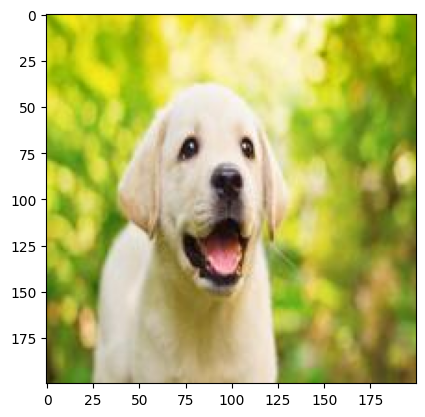

In [50]:
# displaying the image from numpy array

img_res = mpimg.imread('/content/dog_image_resized.jpg')
img_res_plot = plt.imshow(img_res)
plt.show()

Converting RGB images to Grayscale image using OpenCV

In [51]:
# importing OpenCV library
import cv2

In [52]:
img = cv2.imread('/content/dog.jpg')

In [53]:
grayscale_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [54]:
type(grayscale_image)

numpy.ndarray

In [55]:
grayscale_image.shape

(1365, 2048)

cv2.imshow() will display the image. But this will not be allowed in Google Colab.

**from google.colab.patches import cv2_imshow**

In [56]:
from google.colab.patches import cv2_imshow

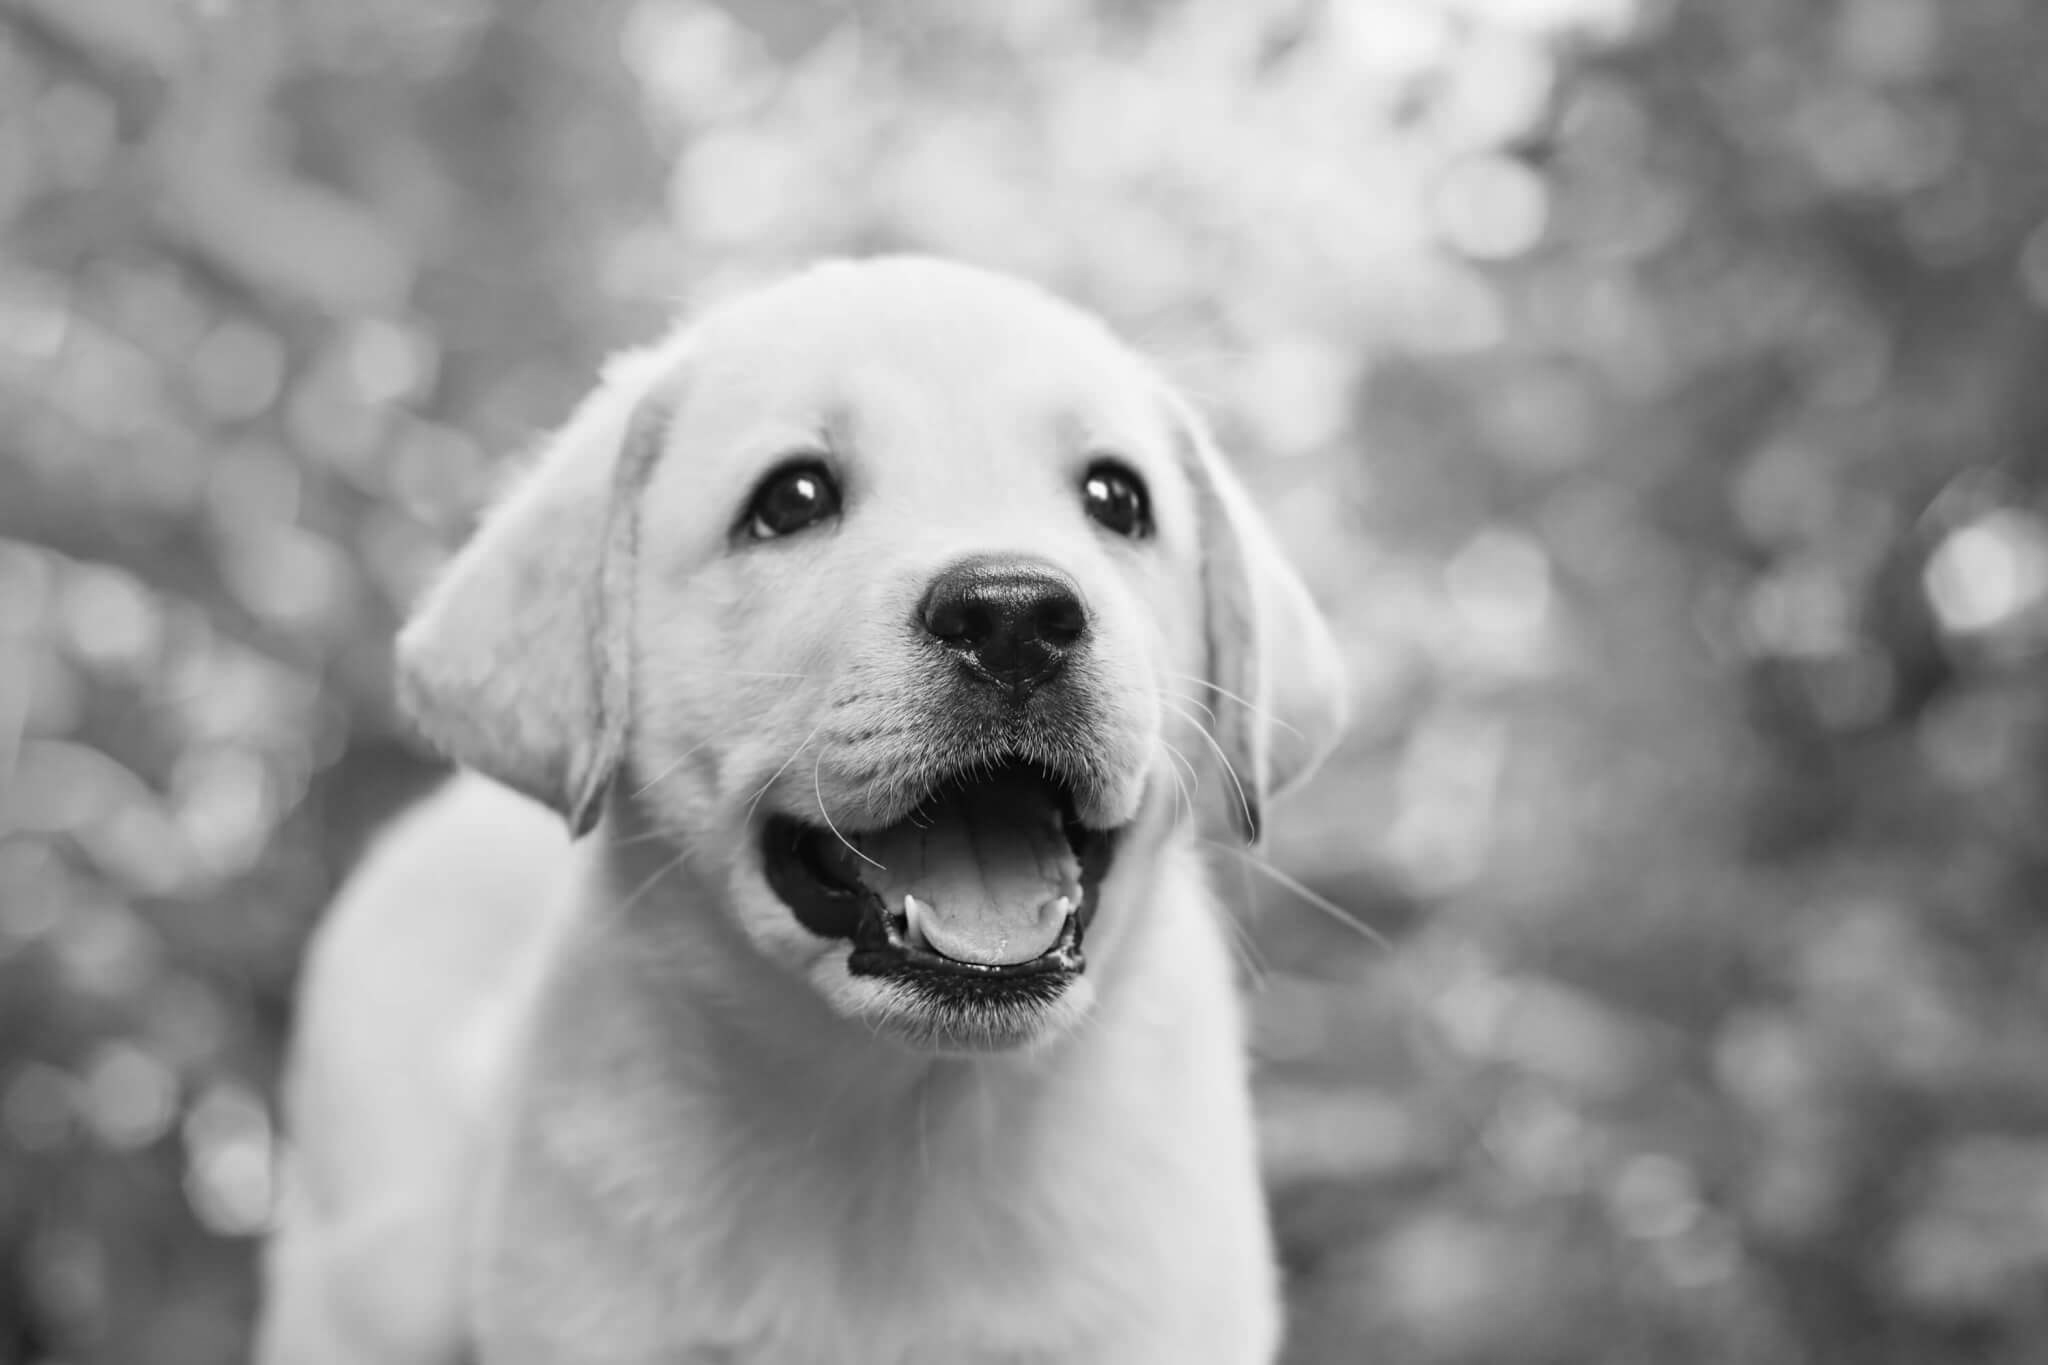

In [57]:
# displaying the image
cv2_imshow(grayscale_image)

In [58]:
# saving the grayscale image
cv2.imwrite('dog_grayscale_image.jpg', grayscale_image)

True

#MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

##Data processing

Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [7]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


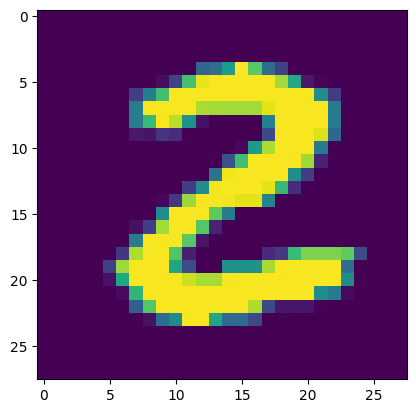

2


In [9]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

##Building the Neural Network

In [14]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])


In [15]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3014 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0692 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.035

Training data accuracy = 98.8%

**Accuracy on Test data:**

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9741
0.9740999937057495


Test data accuracy = 97.4%

In [18]:
print(X_test.shape)

(10000, 28, 28)


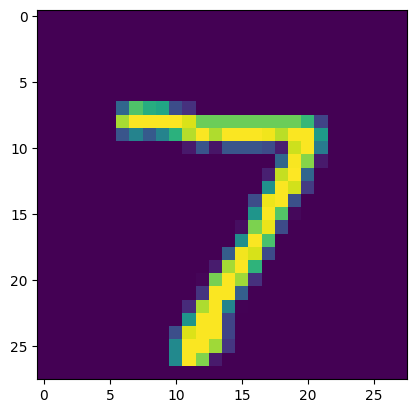

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


model.predict() gives the prediction probability of each class for that data point

In [23]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 3, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 970    1    0    0    1    4    1    1    2    0]
 [   1 1122    2    2    0    1    3    0    4    0]
 [   1    1 1008    4    3    1    2    4    7    1]
 [   0    1    5  975    0   11    0    5    8    5]
 [   0    0    1    1  972    0    6    0    0    2]
 [   1    0    0    8    2  869    1    0   10    1]
 [   7    2    2    1    7    5  930    0    3    1]
 [   2    6    7    4    4    0    0  997    4    4]
 [   5    0    4    7    6   10    2    3  931    6]
 [   2    3    0    8   11    6    1    8    3  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

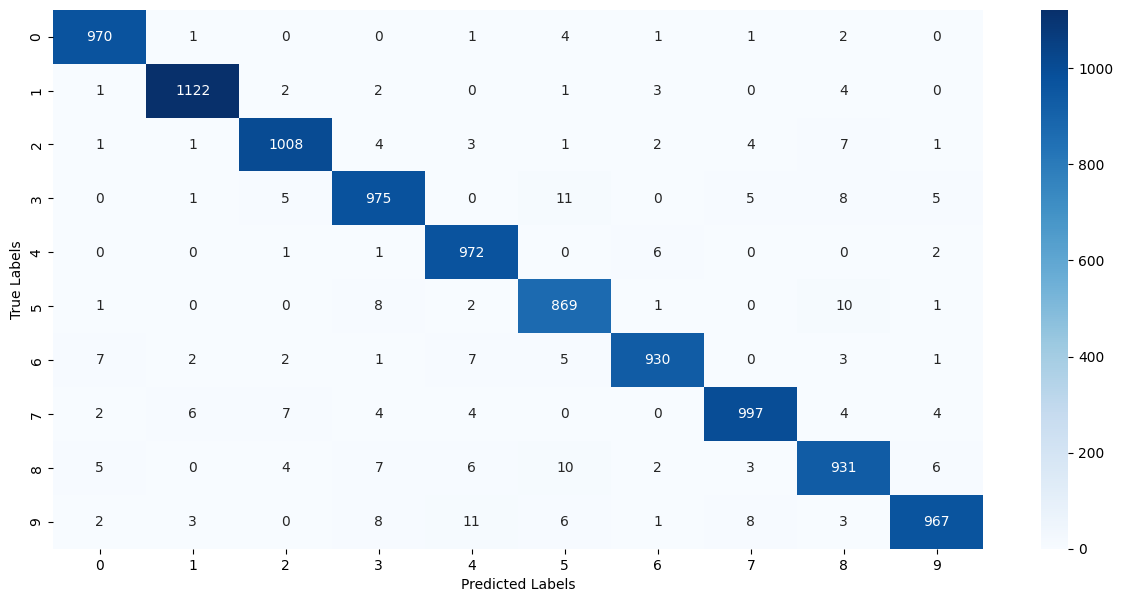

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

##Building a Predictive System

In [28]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


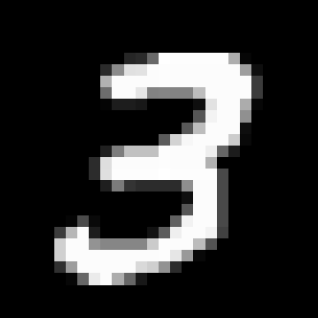

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [40]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 34ms/step
[[4.5751258e-14 2.6373127e-02 2.1664459e-01 1.0000000e+00 3.6055641e-07
  4.0550608e-02 8.2564144e-19 9.9265203e-04 5.7039805e-02 3.8234383e-04]]


In [41]:
input_pred_label = np.argmax(input_prediction)

In [42]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


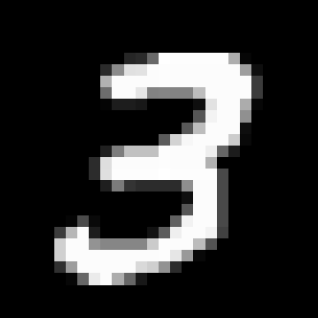

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is recognised as  3


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

#Dog vs Cat Classification Transfer Learning

##Extracting Dataset using Kaggle API

In [44]:
# installing the Kaggle library
!pip install kaggle

In [53]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [54]:
 # Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:10<00:00, 195MB/s]
100% 812M/812M [00:10<00:00, 82.4MB/s]


In [55]:
!ls

dogs-vs-cats.zip  kaggle.json  MNIST_digit.png	sample_data


In [56]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [57]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [58]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [59]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.6399.jpg', 'cat.4350.jpg', 'cat.11215.jpg', 'dog.9249.jpg', 'cat.8229.jpg', 'dog.6871.jpg', 'dog.8639.jpg', 'dog.830.jpg', 'dog.9583.jpg', 'cat.8664.jpg', 'cat.7363.jpg', 'cat.5890.jpg', 'cat.526.jpg', 'cat.11517.jpg', 'cat.5693.jpg', 'dog.7970.jpg', 'dog.3395.jpg', 'dog.11235.jpg', 'dog.3643.jpg', 'cat.6798.jpg', 'dog.7019.jpg', 'dog.6208.jpg', 'cat.1524.jpg', 'cat.8729.jpg', 'cat.1599.jpg', 'cat.5437.jpg', 'dog.8316.jpg', 'dog.1834.jpg', 'cat.6576.jpg', 'dog.8845.jpg', 'cat.3558.jpg', 'cat.5475.jpg', 'dog.10931.jpg', 'cat.9506.jpg', 'cat.1545.jpg', 'cat.9953.jpg', 'cat.6553.jpg', 'dog.9551.jpg', 'dog.10846.jpg', 'dog.4087.jpg', 'dog.2916.jpg', 'dog.7574.jpg', 'cat.131.jpg', 'cat.398.jpg', 'dog.7767.jpg', 'cat.6041.jpg', 'dog.9581.jpg', 'cat.1503.jpg', 'dog.11502.jpg', 'cat.11824.jpg', 'cat.8821.jpg', 'cat.8438.jpg', 'dog.4609.jpg', 'dog.1512.jpg', 'dog.2252.jpg', 'cat.4660.jpg', 'cat.5365.jpg', 'dog.7835.jpg', 'dog.10811.jpg', 'cat.2756.jpg', 'dog.11087.jpg', 'cat.5443.jpg', 'd

##Data preprocessing

Importing the Dependencies

In [60]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

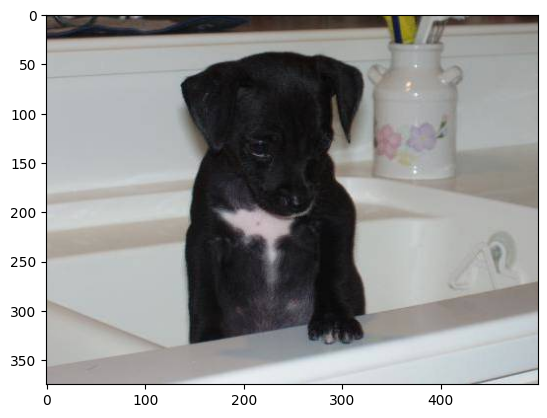

In [61]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

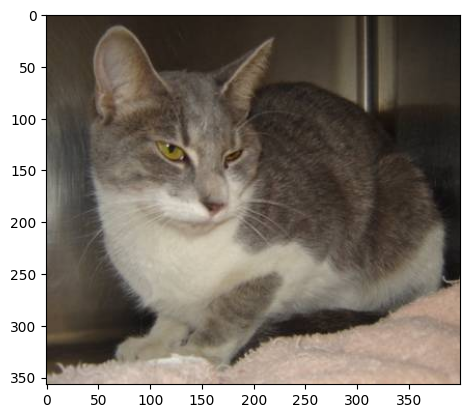

In [62]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [63]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
cat
dog
cat


In [64]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [67]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

# Create the directory if it doesn't exist
import os
os.makedirs(resized_folder, exist_ok=True)

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

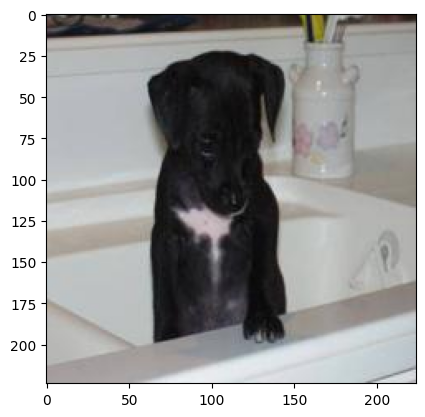

In [70]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

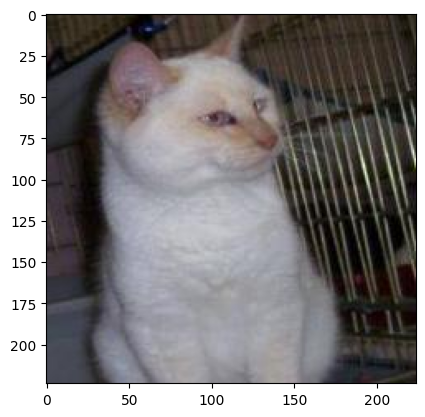

In [71]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10056.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [72]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [73]:
print(filenames[0:5])
print(len(filenames))

['cat.6399.jpg', 'cat.4350.jpg', 'cat.11215.jpg', 'dog.9249.jpg', 'cat.8229.jpg']
2000


In [75]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [76]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 985 1015]


Converting all the resized images to numpy arrays

In [77]:
import cv2
import glob

In [78]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [79]:
print(dog_cat_images)

[[[[  7  13  36]
   [  7  13  36]
   [  5  12  39]
   ...
   [  2  12  36]
   [  0  11  33]
   [  0  11  33]]

  [[  8  14  37]
   [  8  14  37]
   [  6  13  40]
   ...
   [  1  11  35]
   [  0  10  32]
   [  0   9  31]]

  [[  7  15  38]
   [  7  15  38]
   [  7  14  41]
   ...
   [  0   9  33]
   [  0   8  30]
   [  0   7  27]]

  ...

  [[ 52  60  77]
   [ 50  58  75]
   [ 50  58  75]
   ...
   [ 66  77 107]
   [ 66  77 107]
   [ 65  76 106]]

  [[ 54  62  79]
   [ 51  59  76]
   [ 52  60  77]
   ...
   [ 69  80 110]
   [ 66  77 107]
   [ 63  74 104]]

  [[ 58  66  83]
   [ 54  62  79]
   [ 55  63  80]
   ...
   [ 71  82 112]
   [ 65  76 106]
   [ 60  71 101]]]


 [[[171 144 140]
   [170 143 139]
   [168 141 137]
   ...
   [152 119 116]
   [155 124 121]
   [161 130 127]]

  [[166 139 135]
   [165 138 134]
   [163 136 132]
   ...
   [147 114 111]
   [150 119 116]
   [156 125 122]]

  [[164 137 133]
   [163 136 132]
   [161 134 130]
   ...
   [144 111 108]
   [148 117 114]
   [153 122

In [80]:
type(dog_cat_images)

numpy.ndarray

In [81]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [82]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [85]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

##**Building the Neural Network**

In [86]:
import tensorflow as tf
import tensorflow_hub as hub

In [87]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [88]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [89]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [90]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 95s 2s/step - loss: 0.1951 - acc: 0.9231
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0641 - acc: 0.9812
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0471 - acc: 0.9900
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0388 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 67s 1s/step - loss: 0.0316 - acc: 0.9925


In [91]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0742 - acc: 0.9700
Test Loss = 0.0741674154996872
Test Accuracy = 0.9700000286102295


##Predictive System

Path of the image to be predicted: /content/train/cat.10000.jpg


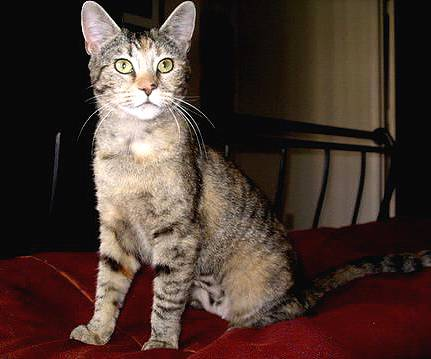

1/1 [==============================] - 1s 538ms/step
[[ 3.2502167 -4.547034 ]]
0
The image represents a Cat


In [92]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')


Path of the image to be predicted: /content/train/cat.10146.jpg


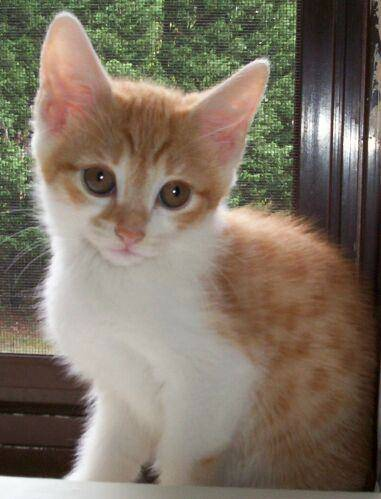

1/1 [==============================] - 0s 68ms/step
[[ 3.9727051 -4.5360565]]
0
The image represents a Cat


In [93]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')